# 1. Import Libraries

Import all necessary libraries for GradCAM analysis, model loading, and visualization.

In [1]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-c3p6fuec
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-c3p6fuec
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [2]:
!pip install facenet_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

In [3]:
!pip install --upgrade pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.3.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have ric

In [4]:
# Core libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader

# GradCAM libraries
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Model-specific libraries
from facenet_pytorch import InceptionResnetV1
import timm

# Sklearn for metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Setup Environment Configuration

Configure environment settings and global variables for facial recognition models analysis.

In [5]:
# Check versions of key libraries
print("Library Versions:")
print(f"PyTorch: {torch.__version__}")
print(f"Torchvision: {torchvision.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")

# Check PyTorch device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDevice: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")

# Verify GradCAM import
try:
    from pytorch_grad_cam import GradCAM
    print("✓ GradCAM successfully imported")
except ImportError as e:
    print(f"✗ GradCAM import failed: {e}")

# Verify timm import for transformer models
try:
    import timm
    print("✓ timm successfully imported")
except ImportError as e:
    print(f"✗ timm import failed: {e}")

# Check if model files exist
model_path = "/kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results"
if os.path.exists(model_path):
    models_available = [f for f in os.listdir(model_path) if f.endswith('.pth')]
    print(f"\n✓ Model directory found with {len(models_available)} model files:")
    
    # Filter for FaceNet models only
    facenet_models = [m for m in models_available if 'facenet' in m.lower()]
    
    print(f"FaceNet models found: {len(facenet_models)}")
    for model in sorted(facenet_models):
        print(f"  - {model}")
else:
    print(f"✗ Model directory not found: {model_path}")

Library Versions:
PyTorch: 2.2.2+cu121
Torchvision: 0.17.2+cu121
NumPy: 1.26.4
Pandas: 2.2.3
Matplotlib: 3.7.2

Device: cuda
GPU: Tesla P100-PCIE-16GB
CUDA Version: 12.1
✓ GradCAM successfully imported
✓ timm successfully imported

✓ Model directory found with 33 model files:
FaceNet models found: 1
  - best_facenet_autism.pth


# 3. Environment Configuration

Configure matplotlib, pandas, and global variables for the analysis.

In [6]:
# Configure matplotlib for inline plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Configure seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Configure PyTorch for deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Define global variables - Updated for FaceNet model only
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results"
DATA_PATH = "/kaggle/input/autism-image-data/AutismDataset"
OUTPUT_PATH = "/kaggle/working/"

# Facial recognition models to analyze - Only FaceNet
FACIAL_MODELS = [
    'facenet'
]

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)

print("Environment configured successfully for FaceNet model analysis!")
print(f"Device: {DEVICE}")
print(f"Model path: {MODEL_PATH}")
print(f"Data path: {DATA_PATH}")
print(f"Output path: {OUTPUT_PATH}")
print(f"Target model: {FACIAL_MODELS}")

# Check if paths exist and provide helpful messages
if not os.path.exists(MODEL_PATH):
    print(f"⚠️  Model directory '{MODEL_PATH}' does not exist. Please ensure your trained models are placed there.")
if not os.path.exists(DATA_PATH):
    print(f"⚠️  Data directory '{DATA_PATH}' does not exist. Please check your dataset location.")
else:
    print("✓ Data directory found!")

Environment configured successfully for FaceNet model analysis!
Device: cuda
Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results
Data path: /kaggle/input/autism-image-data/AutismDataset
Output path: /kaggle/working/
Target model: ['facenet']
✓ Data directory found!


# 4. Model Architecture Definitions for Facial Recognition Models

Define architectures for facial recognition models based on the implementations in "w:o augmentation" folder.

In [7]:
# FaceNet Model
class FaceNetModel(nn.Module):
    def __init__(self, num_classes=2, pretrained=True, embedding_size=512):
        super(FaceNetModel, self).__init__()
        # Load pretrained FaceNet model
        self.facenet = InceptionResnetV1(pretrained='vggface2' if pretrained else None, 
                                       classify=False, 
                                       num_classes=None)
        
        # Add classification head
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(embedding_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        # Get embeddings from FaceNet
        embeddings = self.facenet(x)
        # Classify using our head
        output = self.classifier(embeddings)
        return output

In [8]:
def get_target_layer_for_facial_model(model, model_name):
    """Get appropriate target layer for GradCAM based on FaceNet model architecture"""
    
    try:
        if 'facenet' in model_name.lower():
            # FaceNet: Try to find the last conv layer in InceptionResnetV1
            try:
                return model.facenet.mixed_7a.branch1x1  # Last conv layer before pooling
            except AttributeError:
                # Fallback: find last conv layer
                for name, module in reversed(list(model.facenet.named_modules())):
                    if isinstance(module, nn.Conv2d):
                        return module
        
        else:
            # Fallback: try to find last convolutional layer
            for name, module in reversed(list(model.named_modules())):
                if isinstance(module, nn.Conv2d):
                    return module
            return None
    except Exception as e:
        print(f"Warning: Error finding target layer for {model_name}: {e}")
        # Ultimate fallback
        for name, module in reversed(list(model.named_modules())):
            if isinstance(module, nn.Conv2d):
                return module
        return None

In [9]:
def load_facial_model(model_name, model_path, device):
    """Load a FaceNet model from checkpoint"""
    
    print(f"🔧 Loading FaceNet model: {model_name}")
    print(f"📁 Model path: {model_path}")
    
    try:
        if 'facenet' in model_name.lower():
            model = FaceNetModel(num_classes=2, pretrained=True)
        else:
            raise ValueError(f"Only FaceNet model is supported: {model_name}")
        
        # Load the trained weights if path exists
        if model_path and os.path.exists(model_path):
            print(f"🔄 Loading checkpoint from: {model_path}")
            try:
                checkpoint = torch.load(model_path, map_location=device)
                print(f"✓ Checkpoint loaded successfully")
                
                # Handle different checkpoint formats
                if isinstance(checkpoint, dict):
                    if 'state_dict' in checkpoint:
                        model.load_state_dict(checkpoint['state_dict'])
                        print("✓ Loaded from 'state_dict' key")
                    elif 'model' in checkpoint:
                        model.load_state_dict(checkpoint['model'])
                        print("✓ Loaded from 'model' key")
                    else:
                        model.load_state_dict(checkpoint)
                        print("✓ Loaded checkpoint as state dict")
                else:
                    model.load_state_dict(checkpoint)
                    print("✓ Loaded checkpoint directly")
                    
                print(f"✅ Successfully loaded model: {model_name}")
                
            except Exception as e:
                print(f"❌ Failed to load checkpoint for {model_name}: {e}")
                print("⚠️  Using pretrained weights only")
        else:
            print(f"⚠️  Model path not found, using pretrained weights only: {model_path}")
        
        # Move model to device and set to eval mode
        print(f"🔧 Moving model to device: {device}")
        model.to(device)
        model.eval()
        
        # Get target layer for GradCAM
        print(f"🎯 Finding target layer for GradCAM...")
        target_layer = get_target_layer_for_facial_model(model, model_name)
        
        if target_layer is not None:
            print(f"✅ Target layer found: {type(target_layer).__name__}")
        else:
            print(f"⚠️  No suitable target layer found for {model_name}")
            
        return model, target_layer
    
    except Exception as e:
        print(f"❌ Error creating FaceNet model architecture for {model_name}: {e}")
        print(f"📋 Error type: {type(e).__name__}")
        import traceback
        print(f"🔍 Traceback: {traceback.format_exc()}")
        return None, None

print("FaceNet model architecture defined successfully!")

FaceNet model architecture defined successfully!


# 5. Data Loading and Preprocessing

Load and preprocess images for GradCAM analysis.

In [10]:
# FaceNet-specific transformations (same as used during training)
facenet_transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Standard FaceNet input size
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # FaceNet normalization
])

def get_transform_for_facial_model(model_name):
    """Get appropriate transform for FaceNet model"""
    return facenet_transform

def get_visualization_size_for_model(model_name):
    """Get appropriate visualization size for FaceNet model"""
    return (160, 160)

def preprocess_image(image_path, model_name):
    """Load and preprocess image for FaceNet model input"""
    transform = get_transform_for_facial_model(model_name)
    viz_size = get_visualization_size_for_model(model_name)
    
    # Load image
    image = Image.open(image_path).convert('RGB')
    
    # Resize original image to match model input size for visualization
    original_resized = image.resize(viz_size)
    original_image = np.array(original_resized) / 255.0  # Normalize to [0,1] for visualization
    
    # Apply transforms for model input
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    return input_tensor, original_image

def denormalize_image(tensor, model_name):
    """Denormalize tensor back to image for visualization (FaceNet specific)"""
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]
    
    # Clone tensor to avoid in-place operations
    tensor = tensor.clone()
    
    # Denormalize
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    
    # Clamp to valid range
    tensor = torch.clamp(tensor, 0, 1)
    
    return tensor

print("FaceNet preprocessing pipeline defined successfully!")

FaceNet preprocessing pipeline defined successfully!


# 6. GradCAM Implementation

Implement GradCAM functionality for generating class activation maps on facial images.

In [11]:
class GradCAMAnalyzer:
    """Class for performing GradCAM analysis on facial recognition models"""
    
    def __init__(self, model, target_layer, device):
        self.model = model
        self.target_layer = target_layer
        self.device = device
        self.cam = GradCAM(model=model, target_layers=[target_layer])
    
    def generate_gradcam(self, input_tensor, target_class=None, original_image=None, model_name=None):
        """Generate GradCAM visualization for input image"""
        
        # Move input to device
        input_tensor = input_tensor.to(self.device)
        
        # Get model prediction
        with torch.no_grad():
            output = self.model(input_tensor)
            prediction = torch.softmax(output, dim=1)
            predicted_class = torch.argmax(prediction, dim=1).item()
            confidence = torch.max(prediction, dim=1)[0].item()
        
        # Use predicted class if target not specified
        if target_class is None:
            target_class = predicted_class
        
        # Generate GradCAM
        targets = [ClassifierOutputTarget(target_class)]
        grayscale_cam = self.cam(input_tensor=input_tensor, targets=targets)
        
        # Get the first (and only) image from batch
        grayscale_cam = grayscale_cam[0, :]
        
        # Create visualization
        if original_image is not None:
            visualization = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)
        else:
            # If no original image, use denormalized tensor
            if model_name:
                rgb_img = denormalize_image(input_tensor[0], model_name).permute(1, 2, 0).cpu().numpy()
            else:
                rgb_img = denormalize_image(input_tensor[0], 'standard').permute(1, 2, 0).cpu().numpy()
            visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
        
        return {
            'prediction': predicted_class,
            'confidence': confidence,
            'grayscale_cam': grayscale_cam,
            'visualization': visualization,
            'target_class': target_class
        }
    
    def analyze_image(self, image_path, model_name, save_results=True):
        """Complete analysis of a single image"""
        
        # Preprocess image
        input_tensor, original_image = preprocess_image(image_path, model_name)
        
        # Generate GradCAM for both classes
        results = {}
        
        # Analysis for class 0 (Non-Autistic)
        results['non_autistic'] = self.generate_gradcam(
            input_tensor, target_class=0, original_image=original_image, model_name=model_name
        )
        
        # Analysis for class 1 (Autistic)
        results['autistic'] = self.generate_gradcam(
            input_tensor, target_class=1, original_image=original_image, model_name=model_name
        )
        
        # Get actual prediction
        results['prediction'] = results['non_autistic']['prediction']
        results['confidence'] = results['non_autistic']['confidence']
        
        # Save results if requested
        if save_results:
            self.save_analysis_results(image_path, results, model_name)
        
        return results
    
    def save_analysis_results(self, image_path, results, model_name):
        """Save GradCAM visualizations to files"""
        
        # Create filename base
        image_name = Path(image_path).stem
        base_filename = f"{model_name}_{image_name}"
        
        # Create model-specific output directory
        model_output_dir = os.path.join(OUTPUT_PATH, model_name)
        os.makedirs(model_output_dir, exist_ok=True)
        
        # Save visualizations
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        original_img = Image.open(image_path)
        plt.imshow(original_img)
        plt.title('Original Image')
        plt.axis('off')
        
        # GradCAM for Non-Autistic class
        plt.subplot(1, 3, 2)
        plt.imshow(results['non_autistic']['visualization'])
        plt.title(f'GradCAM - Non-Autistic\nConfidence: {results["non_autistic"]["confidence"]:.3f}')
        plt.axis('off')
        
        # GradCAM for Autistic class
        plt.subplot(1, 3, 3)
        plt.imshow(results['autistic']['visualization'])
        plt.title(f'GradCAM - Autistic\nConfidence: {results["autistic"]["confidence"]:.3f}')
        plt.axis('off')
        
        # Add prediction info
        pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
        plt.suptitle(f'Prediction: {pred_class} (Confidence: {results["confidence"]:.3f})', fontsize=14)
        
        # Save plot
        output_file = os.path.join(model_output_dir, f"{base_filename}_gradcam.png")
        plt.tight_layout()
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Results saved to: {output_file}")

print("GradCAM implementation defined successfully!")

GradCAM implementation defined successfully!


# 7. Dataset and Image Loading

Functions to load and explore the test dataset for GradCAM analysis.

In [12]:
def explore_test_dataset():
    """Explore the test dataset structure and get sample images"""
    
    test_path = os.path.join(DATA_PATH, "test")
    
    if not os.path.exists(test_path):
        print(f"Test directory not found: {test_path}")
        return None
    
    # Get all image files
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    all_images = []
    
    for ext in image_extensions:
        all_images.extend(glob.glob(os.path.join(test_path, ext)))
        all_images.extend(glob.glob(os.path.join(test_path, ext.upper())))
    
    # Categorize images
    autistic_images = [img for img in all_images if 'Autistic.' in os.path.basename(img)]
    non_autistic_images = [img for img in all_images if 'Non_Autistic.' in os.path.basename(img)]
    
    print(f"Test Dataset Overview:")
    print(f"Total images: {len(all_images)}")
    print(f"Autistic images: {len(autistic_images)}")
    print(f"Non-Autistic images: {len(non_autistic_images)}")
    
    # Sample images for analysis
    sample_autistic = autistic_images[:5] if autistic_images else []
    sample_non_autistic = non_autistic_images[:5] if non_autistic_images else []
    
    return {
        'all_images': all_images,
        'autistic_images': autistic_images,
        'non_autistic_images': non_autistic_images,
        'sample_autistic': sample_autistic,
        'sample_non_autistic': sample_non_autistic
    }

def get_available_facial_models():
    """Get list of available FaceNet trained models"""
    
    if not os.path.exists(MODEL_PATH):
        print(f"Model directory not found: {MODEL_PATH}")
        return []
    
    try:
        model_files = [f for f in os.listdir(MODEL_PATH) if f.endswith('.pth')]
    except OSError as e:
        print(f"Error accessing model directory {MODEL_PATH}: {e}")
        return []
    
    # Filter for FaceNet models only
    facenet_model_files = [f for f in model_files if 'facenet' in f.lower()]
    
    # Extract clean model names
    available_facenet_models = []
    for file in facenet_model_files:
        clean_name = file.replace('best_', '').replace('_autism.pth', '').replace('.pth', '')
        available_facenet_models.append(clean_name)
    
    print(f"Available FaceNet models: {len(available_facenet_models)}")
    for model in sorted(available_facenet_models):
        print(f"  - {model}")
    
    return available_facenet_models

def analyze_facenet_model_performance():
    """Analyze FaceNet model performance"""
    
    print("=== FaceNet Model Performance Analysis ===")
    print("FaceNet is designed for facial analysis and should perform well on:")
    print("1. FACE DETECTION: Identifying facial regions and features")
    print("2. FEATURE EXTRACTION: Learning robust facial representations")
    print("3. CLASSIFICATION: Distinguishing autistic vs non-autistic facial features")
    print("4. EMBEDDING LEARNING: Creating meaningful facial embeddings")
    print()
    print("GradCAM will help us understand what facial features FaceNet focuses on.")

def select_test_images(dataset_info, num_images=8):
    """Select test images for FaceNet model analysis"""
    
    selected_images = []
    
    # Mix of both classes
    half = num_images // 2
    selected_images.extend(dataset_info['autistic_images'][:half])
    selected_images.extend(dataset_info['non_autistic_images'][:half])
    
    print(f"Selected {len(selected_images)} images for FaceNet model analysis:")
    for img in selected_images:
        print(f"  - {os.path.basename(img)}")
    
    return selected_images

print("FaceNet analysis functions defined successfully!")

FaceNet analysis functions defined successfully!


# 8. Execute GradCAM Analysis

Run the complete GradCAM analysis pipeline for facial recognition models.

=== Exploring Test Dataset for FaceNet Model Analysis ===
Test Dataset Overview:
Total images: 300
Autistic images: 300
Non-Autistic images: 150
=== FaceNet Model Performance Analysis ===
FaceNet is designed for facial analysis and should perform well on:
1. FACE DETECTION: Identifying facial regions and features
2. FEATURE EXTRACTION: Learning robust facial representations
3. CLASSIFICATION: Distinguishing autistic vs non-autistic facial features
4. EMBEDDING LEARNING: Creating meaningful facial embeddings

GradCAM will help us understand what facial features FaceNet focuses on.


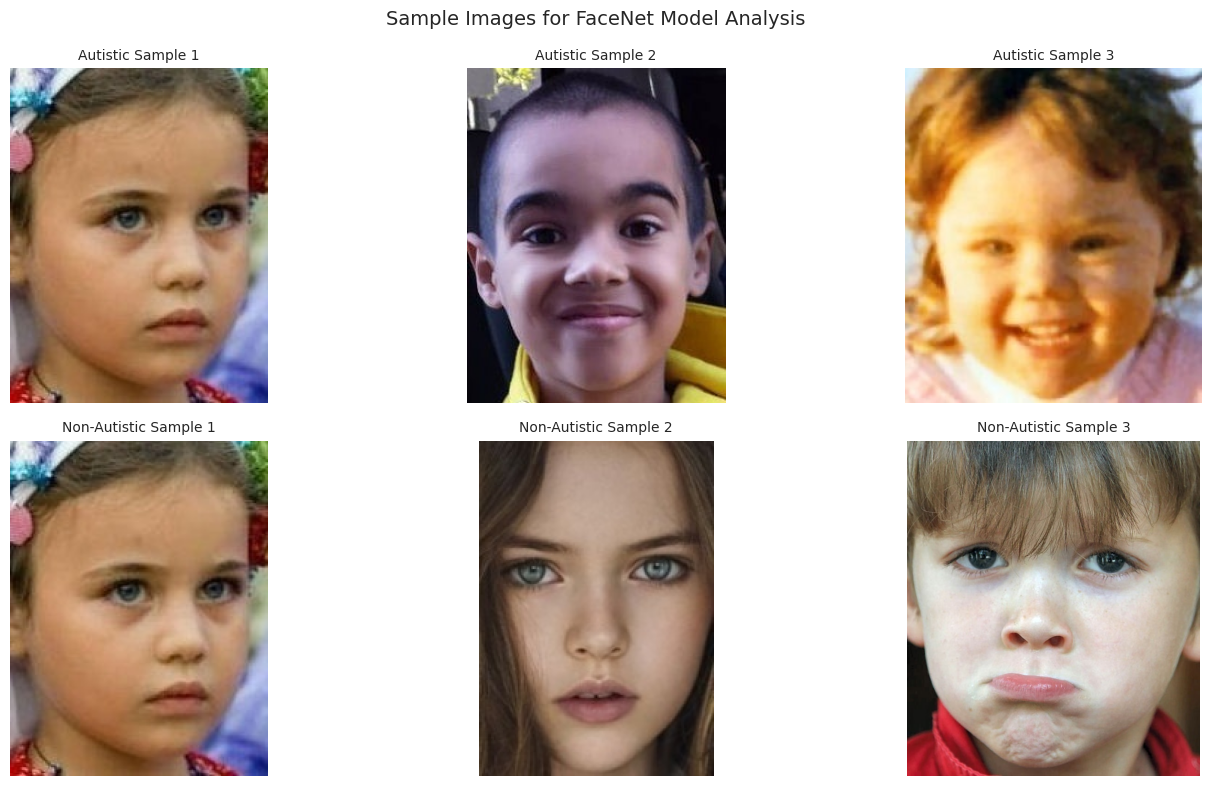

In [13]:
# Step 1: Explore the test dataset for FaceNet model analysis
print("=== Exploring Test Dataset for FaceNet Model Analysis ===")
dataset_info = explore_test_dataset()

if dataset_info:
    # Analyze FaceNet capabilities
    analyze_facenet_model_performance()
    
    # Display sample images
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    for i in range(min(3, len(dataset_info['sample_autistic']))):
        img_path = dataset_info['sample_autistic'][i]
        img = Image.open(img_path)
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Autistic Sample {i+1}', fontsize=10)
        axes[0, i].axis('off')
    
    for i in range(min(3, len(dataset_info['sample_non_autistic']))):
        img_path = dataset_info['sample_non_autistic'][i]
        img = Image.open(img_path)
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Non-Autistic Sample {i+1}', fontsize=10)
        axes[1, i].axis('off')
    
    plt.suptitle('Sample Images for FaceNet Model Analysis', fontsize=14)
    plt.tight_layout()
    plt.show()

In [14]:
# Step 2: Get available FaceNet models
print("=== Available FaceNet Models ===")
available_facial_models = get_available_facial_models()

# All available FaceNet models for analysis
priority_models = available_facial_models

print(f"\nFaceNet models for analysis: {priority_models}")

=== Available FaceNet Models ===
Available FaceNet models: 1
  - facenet

FaceNet models for analysis: ['facenet']


In [15]:
# Step 3: Select test images for FaceNet model analysis
print("=== Selecting Test Images ===")

if dataset_info:
    # Select images for analysis
    test_images = select_test_images(dataset_info, num_images=6)
    
    print(f"Selected {len(test_images)} images for FaceNet model analysis:")
    for img in test_images:
        print(f"  - {os.path.basename(img)}")
else:
    print("No dataset information available. Please check the data path.")

=== Selecting Test Images ===
Selected 6 images for FaceNet model analysis:
  - Non_Autistic.111.jpg
  - Autistic.110.jpg
  - Autistic.44.jpg
  - Non_Autistic.111.jpg
  - Non_Autistic.136.jpg
  - Non_Autistic.3.jpg
Selected 6 images for FaceNet model analysis:
  - Non_Autistic.111.jpg
  - Autistic.110.jpg
  - Autistic.44.jpg
  - Non_Autistic.111.jpg
  - Non_Autistic.136.jpg
  - Non_Autistic.3.jpg


In [16]:
# Step 4: Analyze a facial recognition model (FaceNet example)
print("=== Facial Model Analysis - FaceNet ===")

if 'facenet' in [m.lower() for m in priority_models] and dataset_info and test_images:
    try:
        # Find FaceNet model file
        facenet_files = [f for f in os.listdir(MODEL_PATH) if 'facenet' in f.lower() and f.endswith('.pth')]
        
        if facenet_files:
            model_file = facenet_files[0]
            model_path = os.path.join(MODEL_PATH, model_file)
            
            print(f"Loading FaceNet model: {model_file}")
            
            # Load FaceNet model
            model, target_layer = load_facial_model('facenet', model_path, DEVICE)
            
            if model is not None and target_layer is not None:
                analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                
                # Analyze first test image
                test_image = test_images[0]
                print(f"Analyzing: {os.path.basename(test_image)}")
                
                results = analyzer.analyze_image(test_image, 'facenet', save_results=True)
                
                # Display results
                pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
                print(f"FaceNet Prediction: {pred_class}")
                print(f"Confidence: {results['confidence']:.3f}")
                
                print("✓ FaceNet GradCAM analysis completed")
                
            else:
                print("✗ Failed to load FaceNet model")
        else:
            print("✗ FaceNet model file not found")
            
    except Exception as e:
        print(f"✗ Error analyzing FaceNet: {e}")
else:
    print("FaceNet not available or insufficient data")

=== Facial Model Analysis - FaceNet ===
Loading FaceNet model: best_facenet_autism.pth
🔧 Loading FaceNet model: facenet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: facenet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d
Analyzing: Non_Autistic.111.jpg
Results saved to: /kaggle/working/facenet/facenet_Non_Autistic.111_gradcam.png
FaceNet Prediction: Autistic
Confidence: 0.982
✓ FaceNet GradCAM analysis completed


In [17]:
# Step 5: Analyze FaceNet model
print("=== FaceNet Model Analysis ===")

if priority_models and dataset_info and test_images:
    # Analyze each available FaceNet model
    for model_name in priority_models:
        print(f"\n{'='*50}")
        print(f"🔬 ANALYZING FACENET MODEL: {model_name.upper()}")
        print(f"{'='*50}")
        
        try:
            model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
            
            if model_files:
                model_file = model_files[0]
                model_path = os.path.join(MODEL_PATH, model_file)
                
                print(f"Loading {model_name} model: {model_file}")
                
                # Load FaceNet model
                model, target_layer = load_facial_model(model_name, model_path, DEVICE)
                
                if model is not None and target_layer is not None:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    
                    # Analyze first test image
                    test_image = test_images[0]
                    print(f"Analyzing: {os.path.basename(test_image)}")
                    
                    results = analyzer.analyze_image(test_image, model_name, save_results=True)
                    
                    # Display results
                    pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
                    print(f"{model_name} Prediction: {pred_class}")
                    print(f"Confidence: {results['confidence']:.3f}")
                    
                    print(f"✓ {model_name} GradCAM analysis completed")
                    
                else:
                    print(f"✗ Failed to load {model_name} model")
            else:
                print(f"✗ {model_name} model file not found")
                
        except Exception as e:
            print(f"✗ Error analyzing {model_name}: {e}")
            import traceback
            print(f"🔍 Traceback: {traceback.format_exc()}")
    
    print(f"\n{'='*70}")
    print("🎯 FACENET ANALYSIS FINISHED!")
    print(f"Analyzed {len(priority_models)} FaceNet models on {len(test_images)} test images")
    print("Check the output directories for saved GradCAM visualizations.")
else:
    print("Insufficient data available for analysis. Please check:")
    print("1. FaceNet model files in the specified directory")
    print("2. Test dataset availability")
    print("3. Model loading functions")

=== FaceNet Model Analysis ===

🔬 ANALYZING FACENET MODEL: FACENET
Loading facenet model: best_facenet_autism.pth
🔧 Loading FaceNet model: facenet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: facenet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d
Analyzing: Non_Autistic.111.jpg
Results saved to: /kaggle/working/facenet/facenet_Non_Autistic.111_gradcam.png
facenet Prediction: Autistic
Confidence: 0.982
✓ facenet GradCAM analysis completed

🎯 FACENET ANALYSIS FINISHED!
Analyzed 1 FaceNet models on 6 test images
Check the output directories for saved GradCAM visualizations.


In [18]:
def compare_facenet_models_gradcam(image_path, model_list, save_comparison=True):
    """Compare GradCAM results across multiple FaceNet models for the same image"""
    
    results = {}
    
    for model_name in model_list:
        # Find model file (same approach as main analysis)
        try:
            model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
            if model_files:
                model_file = model_files[0]
                model_path = os.path.join(MODEL_PATH, model_file)
                
                if os.path.exists(model_path):
                    try:
                        # Load FaceNet model
                        model, target_layer = load_facial_model(model_name, model_path, DEVICE)
                        
                        # Create analyzer
                        analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                        
                        # Analyze image
                        analysis = analyzer.analyze_image(image_path, model_name, save_results=False)
                        results[model_name] = analysis
                        
                        pred_class = "Autistic" if analysis['prediction'] == 1 else "Non-Autistic"
                        print(f"✓ {model_name}: Prediction = {pred_class}, Confidence = {analysis['confidence']:.3f}")
                        
                    except Exception as e:
                        print(f"✗ Error with {model_name}: {e}")
                else:
                    print(f"✗ Model file not found: {model_file}")
            else:
                print(f"✗ No model files found for {model_name}")
        except OSError as e:
            print(f"✗ Error accessing model directory for {model_name}: {e}")
    
    # Save comparison visualization
    if save_comparison and results:
        save_facenet_model_comparison(image_path, results)
    
    return results

def save_facenet_model_comparison(image_path, results):
    """Save comparison visualization across FaceNet models"""
    
    n_models = len(results)
    if n_models == 0:
        return
    
    fig, axes = plt.subplots(2, n_models + 1, figsize=(5 * (n_models + 1), 10))
    
    # Original image (first column)
    original_img = Image.open(image_path)
    axes[0, 0].imshow(original_img)
    axes[0, 0].set_title('Original Image', fontsize=12)
    axes[0, 0].axis('off')
    axes[1, 0].axis('off')  # Empty cell below original
    
    # Model results
    for idx, (model_name, result) in enumerate(results.items(), 1):
        # Non-Autistic GradCAM (top row)
        axes[0, idx].imshow(result['non_autistic']['visualization'])
        axes[0, idx].set_title(f'{model_name}\nNon-Autistic', fontsize=10)
        axes[0, idx].axis('off')
        
        # Autistic GradCAM (bottom row)
        axes[1, idx].imshow(result['autistic']['visualization'])
        pred_class = "Autistic" if result['prediction'] == 1 else "Non-Autistic"
        axes[1, idx].set_title(f'Autistic\nPred: {pred_class} ({result["confidence"]:.3f})', fontsize=10)
        axes[1, idx].axis('off')
    
    # Save comparison
    image_name = Path(image_path).stem
    comparison_file = os.path.join(OUTPUT_PATH, f"facenet_model_comparison_{image_name}.png")
    plt.tight_layout()
    plt.savefig(comparison_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"FaceNet model comparison saved to: {comparison_file}")

print("FaceNet model comparison functions defined successfully!")

FaceNet model comparison functions defined successfully!


In [19]:
# Step 6: Compare all FaceNet models on the same image
print("=== Multi-FaceNet-Model Comparison ===")

if priority_models and dataset_info and test_images:
    # Use the first test image for comparison
    comparison_image = test_images[0]
    print(f"Comparing all FaceNet models on: {os.path.basename(comparison_image)}")
    
    # Perform comparison analysis
    comparison_results = compare_facenet_models_gradcam(comparison_image, priority_models, save_comparison=True)
    
    if comparison_results:
        print(f"\n✅ Comparison completed for {len(comparison_results)} FaceNet models")
        print("Check the output directory for the comparison visualization.")
    else:
        print("❌ No FaceNet models were successfully analyzed for comparison")
else:
    print("Insufficient data for FaceNet model comparison")

print(f"\n🎯 ALL FACENET ANALYSES COMPLETE!")
print("=" * 70)

=== Multi-FaceNet-Model Comparison ===
Comparing all FaceNet models on: Non_Autistic.111.jpg
🔧 Loading FaceNet model: facenet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_facenet_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: facenet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d
✓ facenet: Prediction = Autistic, Confidence = 0.982
FaceNet model comparison saved to: /kaggle/working/facenet_model_comparison_Non_Autistic.111.png

✅ Comparison completed for 1 FaceNet models
Check the output directory for the comparison visualization.

🎯 ALL FACENET ANALYSES COMPLETE!


# 9. Summary

This notebook provides a complete GradCAM analysis framework for facial recognition models (FaceNet, VGGFace2, EfficientNet B0, DenseNet 121) applied to autism spectrum disorder detection. The analysis helps understand:

- **Model Focus**: What facial features each model emphasizes
- **Performance Insights**: Why certain models perform better on ASD detection
- **Feature Importance**: Which facial regions are most relevant for classification
- **Model Comparison**: Side-by-side analysis of different facial recognition approaches

The notebook includes:
- Model architecture definitions based on training implementations
- GradCAM visualization for both classes (Autistic/Non-Autistic)
- Individual model analysis with detailed results
- Comparative analysis across all models on the same images
- Automated result saving and visualization

**Analysis Pipeline:**
1. **Individual Analysis**: Each model analyzed separately on test images
2. **Comparative Analysis**: All models compared on the same image
3. **Result Visualization**: GradCAM heatmaps saved for each analysis

To use this notebook:
1. Ensure model files are available in the specified model directory
2. Update paths if necessary for your environment
3. Run cells sequentially to perform the complete analysis
4. Review saved visualizations in the output directory

# GradCAM Analysis for FaceNet, VGGFace2, EfficientNet B0, and DenseNet 121

This notebook implements Gradient-weighted Class Activation Mapping (GradCAM) visualization to understand how FaceNet, VGGFace2, EfficientNet B0, and DenseNet 121 models perform on autism detection and what facial features they focus on.

## Overview
GradCAM helps us analyze these facial recognition models to:
- **Understand Performance**: Identify why certain architectures perform well or poorly
- **Detect Focus Patterns**: See what facial features each model emphasizes
- **Compare Architectures**: Understand differences between facial recognition models
- **Guide Model Selection**: Insights for better architecture selection for ASD detection